In [2]:
import pandas as pd
import matplotlib

In [6]:
df = pd.read_csv("small_data\TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [7]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certain rows

In [10]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Show certain columns

In [11]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [12]:
df["   TG"]

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [13]:
df[["   TG", "    DATE"]]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


# Simple statistics and filtering

In [41]:
import numpy as np
df = df.loc[df["   TG"] != -9999]
df["TG0"] = df["   TG"].mask(df["   TG"] == -9999, np.nan)

In [42]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Farenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21
1,1,35381,1860-01-02,46,0,4.6,40.28,46
2,1,35381,1860-01-03,31,0,3.1,37.58,31
3,1,35381,1860-01-04,37,0,3.7,38.66,37
4,1,35381,1860-01-05,31,0,3.1,37.58,31
...,...,...,...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0,8.0,46.40,80
53656,1,35381,2006-11-27,70,0,7.0,44.60,70
53657,1,35381,2006-11-28,71,0,7.1,44.78,71
53658,1,35381,2006-11-29,63,0,6.3,43.34,63


In [20]:
df["   TG"].mean()/10

6.360787526128467

In [21]:
df["   TG"].max()/10

26.2

In [22]:
df["   TG"].min()/10

-28.8

# Data analisis Histiogram

<AxesSubplot: >

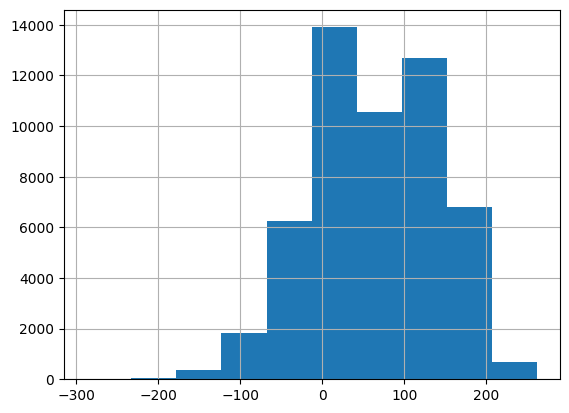

In [23]:
df["   TG"].hist()

# Get certain cells

In [27]:
df.loc[df["    DATE"] == "1860-01-05"]["   TG"].squeeze()/10

3.1

In [31]:
df.loc[df["   TG"]== df["   TG"].max()]["    DATE"].squeeze()

Timestamp('1868-08-16 00:00:00')

In [32]:
df.loc[3, "   TG"]

37

# Calculate new column out of existing column

In [37]:
import numpy as np

In [39]:
df["TG0"] = df["   TG"].mask(df["   TG"] == -9999, np.nan)
df

C:\Users\dcies\AppData\Local\Temp\ipykernel_484\2656301364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TG0"] = df["   TG"].mask(df["   TG"] == -9999, np.nan)


,STAID,SOUID,DATE,TG,Q_TG,TG,Farenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21
1,1,35381,1860-01-02,46,0,4.6,40.28,46
2,1,35381,1860-01-03,31,0,3.1,37.58,31
3,1,35381,1860-01-04,37,0,3.7,38.66,37
4,1,35381,1860-01-05,31,0,3.1,37.58,31
...,...,...,...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0,8.0,46.40,80
53656,1,35381,2006-11-27,70,0,7.0,44.60,70
53657,1,35381,2006-11-28,71,0,7.1,44.78,71
53658,1,35381,2006-11-29,63,0,6.3,43.34,63


In [33]:
df["TG"] = df["   TG"]/10

C:\Users\dcies\AppData\Local\Temp\ipykernel_484\2429591685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TG"] = df["   TG"]/10


In [34]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG
0,1,35381,1860-01-01,21,0,2.1
1,1,35381,1860-01-02,46,0,4.6
2,1,35381,1860-01-03,31,0,3.1
3,1,35381,1860-01-04,37,0,3.7
4,1,35381,1860-01-05,31,0,3.1
...,...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0,8.0
53656,1,35381,2006-11-27,70,0,7.0
53657,1,35381,2006-11-28,71,0,7.1
53658,1,35381,2006-11-29,63,0,6.3


In [35]:
df["Farenheit"] = df["TG"] * (9/5) + 32

C:\Users\dcies\AppData\Local\Temp\ipykernel_484\1201011347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Farenheit"] = df["TG"] * (9/5) + 32


In [36]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Farenheit
0,1,35381,1860-01-01,21,0,2.1,35.78
1,1,35381,1860-01-02,46,0,4.6,40.28
2,1,35381,1860-01-03,31,0,3.1,37.58
3,1,35381,1860-01-04,37,0,3.7,38.66
4,1,35381,1860-01-05,31,0,3.1,37.58
...,...,...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0,8.0,46.40
53656,1,35381,2006-11-27,70,0,7.0,44.60
53657,1,35381,2006-11-28,71,0,7.1,44.78
53658,1,35381,2006-11-29,63,0,6.3,43.34


# Plotting

<AxesSubplot: >

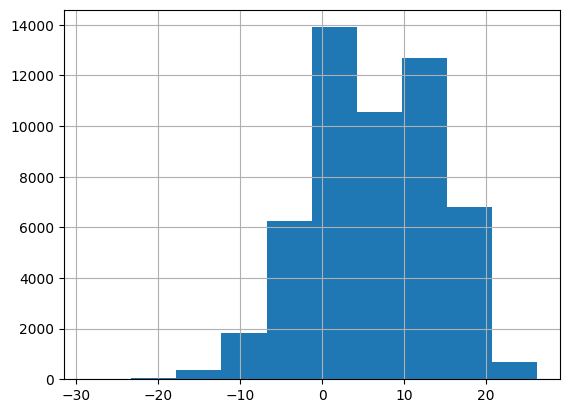

In [43]:
df["TG"].hist()

In [45]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG', 'TG', 'Farenheit',
       'TG0'],
      dtype='object')

<AxesSubplot: xlabel='    DATE'>

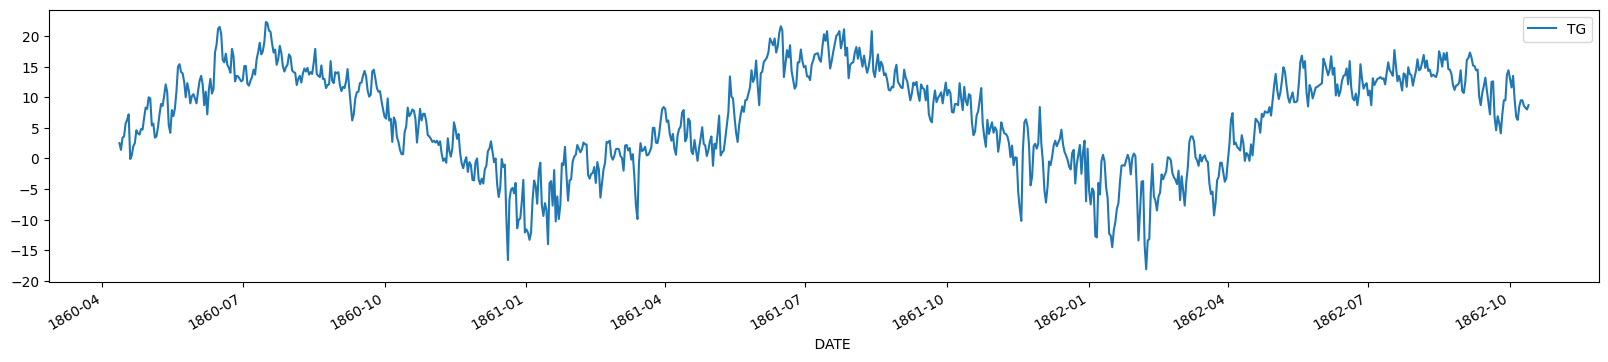

In [47]:
df[100:1000].plot(x="    DATE", y="TG", figsize=(20, 4))